In [1]:
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import re as re

import matplotlib.pyplot as plt

#For making videos from images
import cv2
import glob

import importlib as il

#Home made modules
#import Rolling_window_projection_along_neurite_u as projection

#Color palette for plotting
sns.set_palette('tab20')
current_palette = sns.color_palette()
colors = current_palette.as_hex()

In [4]:
folder = r"F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Analysis"

In [5]:
list_datadirs = [] #DIVs here used for iterate over folders
for DIVs in os.listdir(folder):
    div = re.search('DIV(\d)', DIVs).group(1)
    for ROIs in os.listdir(folder+'\\'+DIVs): 
        if os.path.isdir(folder+'\\'+DIVs+'\\'+ROIs): 
            ROI = re.search('R\w{1,2}(\d)', ROIs).group(1)
            if ROI !='2':
                datadir = folder+'\\'+DIVs+'\\'+ROIs
                list_datadirs.append(datadir)
                print(datadir)
                print(len(list_datadirs))

F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Analysis\2022_10_31_Motor_PAINT_Neurons_DIV0_Analysis\S02_C01_ROI1
1
F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Analysis\2022_11_01_Motor_PAINT_Neurons_DIV1_Analysis\S03_C01_ROI1
2
F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Analysis\2022_11_07_Motor_PAINT_Neurons_DIV0_Analysis\S01_C01_RO1
3
F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Analysis\2022_11_07_Motor_PAINT_Neurons_DIV0_Analysis\S02_C01_RO1
4
F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Analysis\2022_11_08_Motor_PAINT_Neurons_DIV1_Analysis\S01_C01_ROI1
5
F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Analysis\2022_11_08_Motor_PAINT_Neurons_DIV1_Analysis\S01_C02_ROI1
6
F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Analysis\2022_11_08_Motor_PAINT_Neurons_DIV1_Analysis\S03_C01_ROI1
7
F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Analysis\2022_11_08_Motor_PAINT_Neurons

F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Analysis\2024-04-09_Motor_PAINT_Neurons_DIV1_Analysis\S02_C03_R01
115
F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Analysis\2024-04-09_Motor_PAINT_Neurons_DIV1_Analysis\S02_C04_R01
116


In [239]:
datadir = list_datadirs[0]
print(datadir)
neuron_mdf_n = pd.read_csv(datadir+'\\'+fr'DF_statitics_per_neurite.csv')

F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Analysis\2022_10_31_Motor_PAINT_Neurons_DIV0_Analysis\S02_C01_ROI1


In [ ]:
plt.figure(figsize=(10, 10))

dfs = neuron_mdf_n[['Neurite_label', 'PLUS_IN_w', 'X_(px)', 'Y_(px)']].sample(frac=0.4)
sns.scatterplot(x=dfs['X_(px)'], y=dfs['Y_(px)'],\
                hue=dfs['Neurite_label'], marker='.', linewidth=0, alpha=0.7,\
                palette=colors[0:len(dfs['Neurite_label'].unique())])
plt.gca().invert_yaxis()
plt.title('Labelled neurites')
plt.legend(loc='lower left')
plt.show()

In [89]:
#concatenate branching structures 
# Give the secondary branches in this list 
re_labelled = []
# Give the number of the primary branch in this list 
outputs = []
conditions = [neuron_mdf_n['Neurite_label'] == i for i in re_labelled]

res = np.select(conditions, outputs, neuron_mdf_n['Neurite_label'])
neuron_mdf_n['Neurite_label_new'] = pd.Series(res)
sns.scatterplot(x= neuron_mdf_n['X_(px)'].sample(frac=0.5), y=neuron_mdf_n['Y_(px)'].sample(frac=0.5),\
                hue=neuron_mdf_n['Neurite_label_new'], marker='.', linewidth=0, alpha=0.7,\
                palette=colors[0:len(neuron_mdf_n['Neurite_label_new'].unique())])
plt.gca().invert_yaxis()
plt.title('Labelled neurites')
plt.legend(loc='lower left')
plt.show()

ValueError: select with an empty condition list is not possible

In [97]:
def get_per_section_statistics(df = pd.DataFrame() ): 
    #Give  data frame neuron_mdf_n
    df['Frac_Plusin_neurite'] =\
    df.groupby(df.Neurite_label)['PLUS_IN_w'].transform('sum')/df.groupby(df.Neurite_label)['PLUS_IN_w'].transform('count')
    
    if 'Neurite_label_new' not in df.columns: 
        df['Neurite_label_new'] = df['Neurite_label'] 
    
    df['Frac_Plusin_fullneurite'] =\
    df.groupby(df.Neurite_label_new)['PLUS_IN_w'].transform('sum')/df.groupby(df.Neurite_label_new)['PLUS_IN_w'].transform('count')
    
    df['Primary_section'] = df['Neurite_label'] == df['Neurite_label_new']
    
    return df

In [98]:
neuron_mdf_n = get_per_section_statistics(df=neuron_mdf_n)

#Which one is or are the longest based on phalloidin
cond = (neuron_mdf_n['Neurite_label_new'] == 1) #SPECIFY LONGEST NEURITE HERE!!!

neuron_mdf_n['Longest_neurite'] = np.where(cond,True, False)

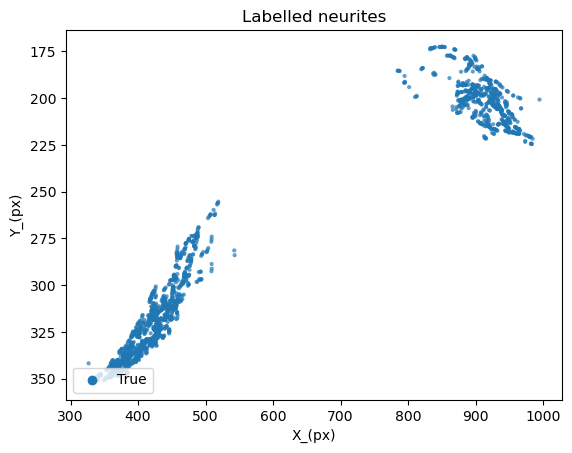

In [99]:
sns.scatterplot(x = neuron_mdf_n['X_(px)'].sample(frac=0.4), y=neuron_mdf_n['Y_(px)'].sample(frac=0.5),\
                hue=neuron_mdf_n['Primary_section'], marker='.', linewidth=0, alpha=0.7,\
                palette=colors[0:len(neuron_mdf_n['Primary_section'].unique())])
plt.gca().invert_yaxis()
plt.title('Labelled neurites')
plt.legend(loc='lower left')
plt.show()

In [100]:
neuron_mdf_n = neuron_mdf_n[['Track_ID', 'Old_Track_ID', 'X_(px)', 'Y_(px)', 'Frame_Number',\
       'X_(nm)', 'X_loc_error(nm)', 'Y_(nm)', 'Y_loc_error(nm)',\
       'Plus_IN', 'Neurite_label', 'X_new', 'Y_new', 'Y_medianfilt',\
       'P_x', 'P_y', 'Q_x', 'Q_y', 'A_x', 'A_y', 'B_x',\
       'B_y', 'median_length',\
       'projection_median', 'PLUS_IN_w', 'Neurite_label_new',\
       'Frac_Plusin_neurite', 'Frac_Plusin_fullneurite', 'Primary_section',\
       'Longest_neurite', 'DIV', 'Stage', 'Cell', 'spline_distance_start', 'spline_distance_end', 'Window_number']]
neuron_mdf_n.to_csv(path_or_buf=datadir+'\\'+fr'DF_statitics_per_neurite_updated.csv', index=False)

In [101]:
print(datadir)

F:\PERSONAL\Malina\NanoscopeII\mP_LastRound\Analysis\2024-04-09_Motor_PAINT_Neurons_DIV1_Analysis\S02_C04_R01
